##### Copyright 2026 Google LLC.

# Gemini Quickstart: Get Started with Gemini for Robotics

Welcome to **Gemini for Robotics**.

This notebook demonstrates how to apply Gemini models to common robotics tasks. By bridging the gap between digital data (pixels and text) and semantic understanding, these models can act as the "eyes and brain" of a robotic system.

This notebook serves as an introductory overview of the foundational Gemini capabilities specifically tailored for robotics development:
*   **Locate objects** with precise 2D points.
*   **Define boundaries** with spatial bounding boxes.
*   **Reason about physics** using the `thinking` parameter.
*   **Analyze temporal events** in video data.

This notebook uses Gemini 3.0 Flash (`gemini-3-flash-preview`) by default. Other models like Gemini Robotics-ER 1.5 (`gemini-robotics-er-1.5-preview`) may perform better for your specific use case.

## 1. Setup & Initialization
Run these cells to install the SDK, download assets, and import utility functions.

In [ ]:
%pip install -U -q google-genai google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [ ]:
# Download helper utilities
import os
import urllib.request
if not os.path.exists('robotics_utils.py'):
    url = "https://raw.githubusercontent.com/williamito/robotics-samples/refs/heads/rewrite/robotics_utils.py?token=GHSAT0AAAAAADS2JPNJS7O2QV5K5PIIT25Q2L37DKQ"
    urllib.request.urlretrieve(url, 'robotics_utils.py')

import robotics_utils as utils
utils.download_assets()

In [ ]:
# Read GEMINI_API_KEY
from google.colab import userdata
from google import genai
from google.genai import types

GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")
client = genai.Client(api_key=GEMINI_API_KEY)

## 2. Core Capabilities

In [ ]:
# Examples settings
model_name = "gemini-3-flash-preview"
default_config = types.GenerateContentConfig(
    temperature=0.5,
    response_mime_type="application/json", # JSON output
    thinking_config={"thinking_budget": 0} # Thinking off
)


### Capability A: Localization (Points)
Gemini can identify specific objects and return 2D coordinates normalized to a 0-1000 scale. This data is essential for controlling robot motion based on visual feedback.

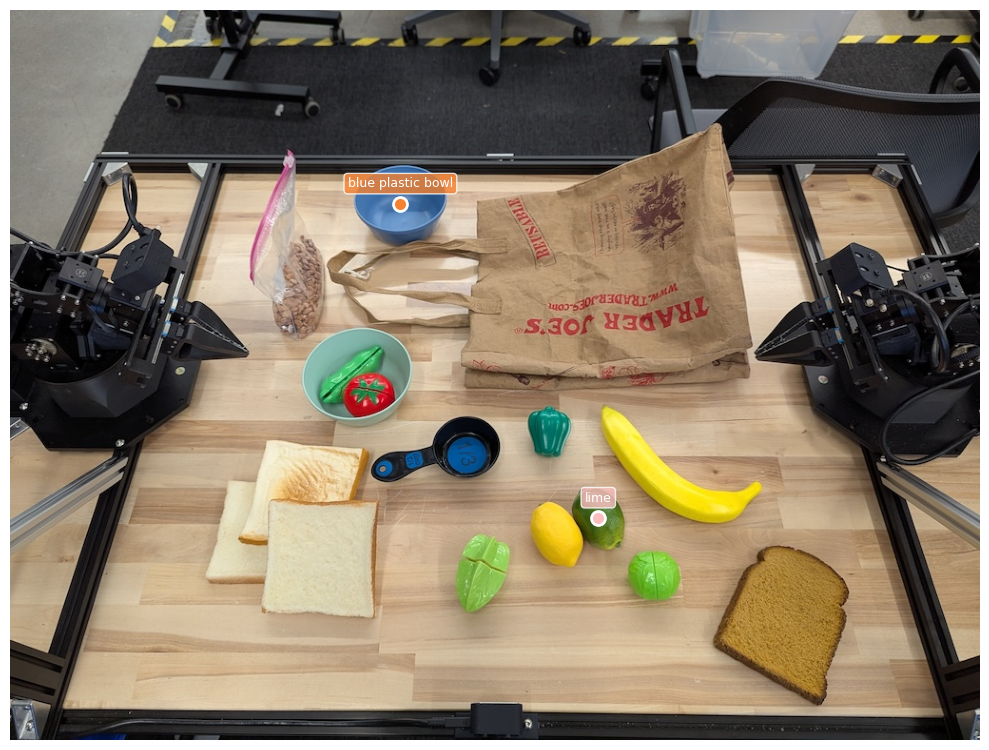

In [ ]:
from PIL import Image
img = Image.open("aloha-arms-table.png")

prompt = "Point to the blue plastic bowl and lime."

response = client.models.generate_content(
    model=model_name,
    contents=[img, prompt],
    config=default_config,
)

utils.visualize_detections(img, response.text)

### Capability B: Spatial Boundaries (Boxes)
Bounding boxes define the spatial extent of an object. In a robotics context, these boxes can be used to populate an occupancy grid or define "No-Fly Zones" for motion planning.

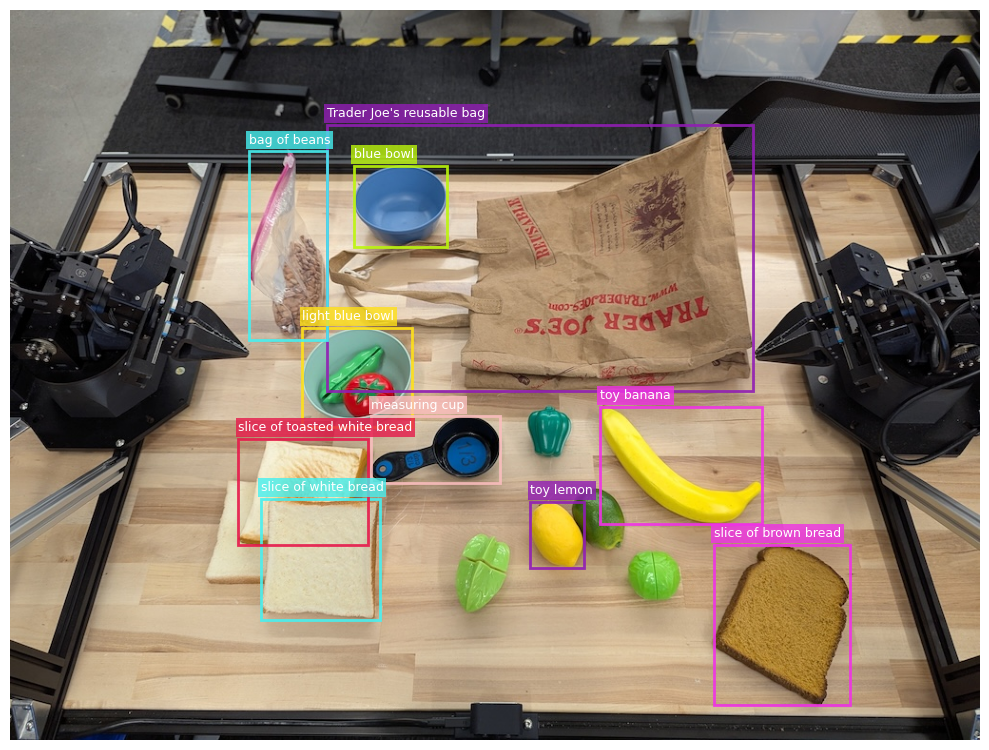

In [ ]:
prompt = "Return bounding boxes for all objects on the table. Limit to 10 items."

response = client.models.generate_content(
    model=model_name,
    contents=[img, prompt],
    config=default_config,
)

utils.visualize_detections(img, response.text)

### Capability C: Physical Reasoning (Thinking)
By enabling `thinking`, the model can spend additional time to reason about abstract properties like mass, material, or fragility, helping a robot decide *how* to interact with an object.

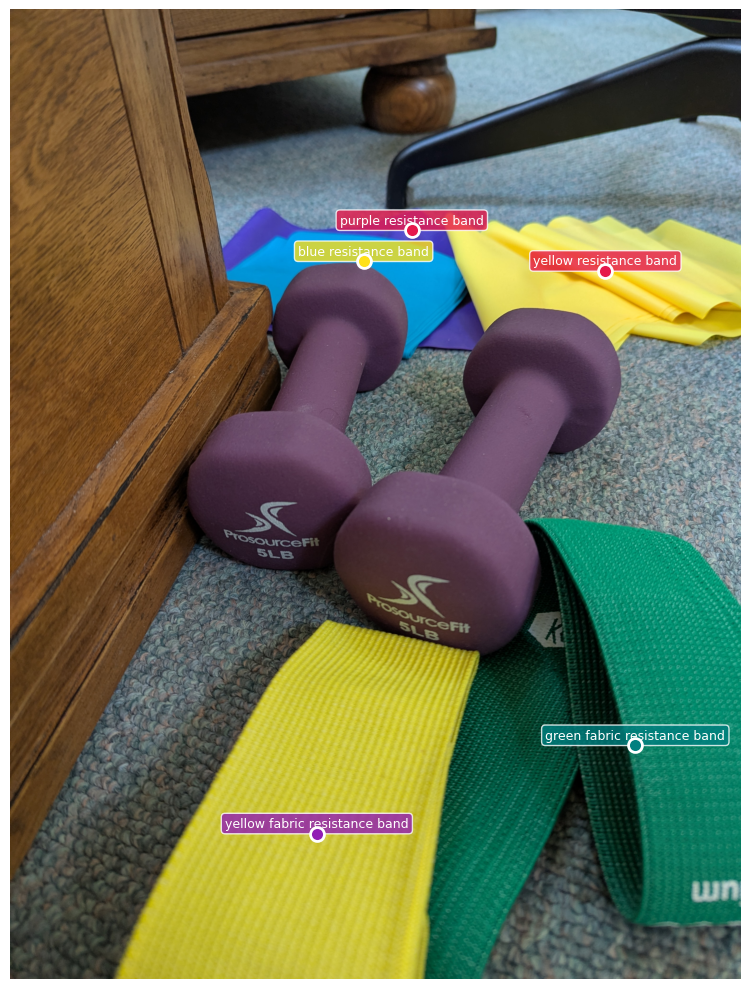

In [ ]:
img_weights = Image.open("weights.jpeg")
prompt = "I am a robot with a payload limit of 3 LBs. Point to items I can pick up."

reasoning_config = default_config
reasoning_config.thinking_config.thinking_budget = -1 # Dynamic budget

response = client.models.generate_content(
    model=model_name,
    contents=[img_weights, prompt],
    config=default_config,
)

utils.visualize_detections(img_weights, response.text)

### Capability D: Temporal Logic (Video)
Multimodal models can analyze video sequences to understand tasks over time, enabling "Learning from Demonstration" or verifying if a task was completed successfully.

#### Sample video

<video width=600 controls>
  <source src="https://storage.googleapis.com/generativeai-downloads/images/robotics/er-1-5-example-colab/desk_organization.mp4" type="video/mp4">
</video>

In [ ]:
import pathlib

video_path = pathlib.Path("desk_organization.mp4")
video_part = types.Part(
    inline_data=types.Blob(
        data=video_path.read_bytes(),
        mime_type='video/mp4'
    ),
    video_metadata=types.VideoMetadata(fps=5)
)

prompt = "Summarize the steps taken in this video to organize the desk."

response = client.models.generate_content(
    model=model_name,
    contents=[video_part, prompt],
    config={"temperature": 0.5} # Thinking on by default
)
print(response.text)

In this video, three robotic arms work together to organize a desk by performing the following steps:

1. **Stow the green marker:** The leftmost robotic arm picks up the green marker from the desk and places it into the white organizer box.
2. **Stow the blue pen:** The leftmost robotic arm then picks up the blue pen and places it into the mesh pen holder in the center of the desk.
3. **Stow the red pen:** Finally, the rightmost robotic arm picks up the red pen and places it into the mesh pen holder alongside the blue pen.


## Explore Further

Now that you've seen the overview, explore the specific capabilities in detail:

*   **[Spatial Awareness](./spatial_awareness.ipynb)**: Detailed localization and boundaries.
*   **[Physical Reasoning](./physical_reasoning.ipynb)**: Compliance, mass, and material logic.
*   **[Task Orchestration](./task_orchestration.ipynb)**: Video analysis and closed-loop verification.
*   **[API Features](./robotics_api_features.ipynb)**: Engineering for reliability and determinism.